# Logistic Regression:
In this checkpoint, we are going to work on the Titanic data set, we will use logistic regression to predict if a passenger will survive or not. 

## 0. Preprocessing 

In [1]:
#import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
# Load the dataset
df = pd.read_csv('data/titanic-passengers.csv', sep =';') 
# Print the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
# Print the summary statistics of the dataset
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Print the data information of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
# Check for missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] =df['Age'].fillna(df['Age'].mean())

In [7]:
df['Age'].isnull().sum()

0

In [8]:
df.Embarked.fillna(df['Embarked'].mode()[0], inplace=True)  

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
df =df.dropna(axis=1)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# feature transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [13]:
#preparing data for logistic regression

# Survived is the output 
# First Methode
from sklearn.preprocessing import LabelEncoder

df['Survived'] = LabelEncoder().fit_transform(df['Survived'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [14]:
# Second Methode
# df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert Survived variable into numerical
Gender  = {'male' : 0, 
           'female': 1}

df['Sex'] =   df['Sex'].replace(Gender) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S


In [15]:
#embarked
# Third Methode : One hot encoding
one_hot =pd.get_dummies(df['Embarked'])
one_hot

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,1,0,0
887,1,0,0
888,0,0,1
889,0,0,1


In [16]:
df = df.join(one_hot)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,S,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,S,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,S,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,S,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,S,0,0,1


In [17]:
df =df.drop('Embarked',axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [18]:
#drop useless data
df = df.drop(["PassengerId","Ticket","Name"],axis=1)

In [19]:
#final data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   C         891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 48.0 KB


<AxesSubplot:>

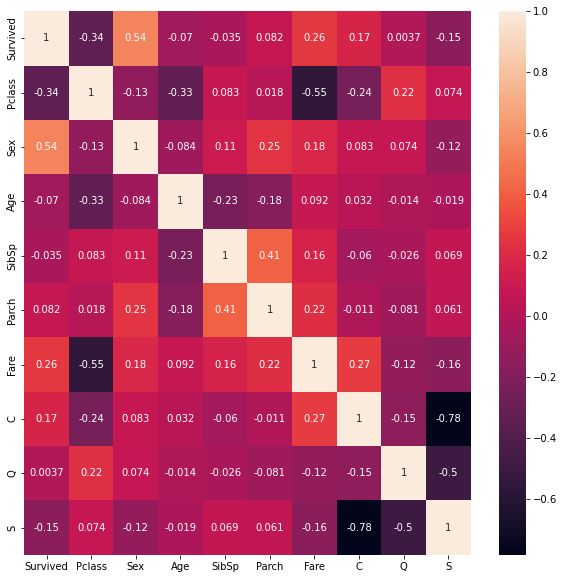

In [20]:
#Feature selection
plt.figure(figsize=[10,10])
corr=df.corr()
sns.heatmap(corr,annot=True)

## 1. Apply logistic regression

In [21]:
#Logistic Regression
# with one dimension
# best feature is "sex"

In [42]:
#feature extraction
x = df[['Sex']]
y = df['Survived']

In [43]:
#splitting data with test size of 25%
SEED = 30
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= SEED)  

In [44]:
model = LogisticRegression()  #build our logistic model
model.fit(x_train, y_train)  #fitting training data
y_pred  = model.predict(x_test) #testing model’s performance

print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

Accuracy=0.73


In [45]:
# Multiple dimension
# feature selection

corr["Survived"].sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Fare        0.257307
C           0.168240
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.069809
S          -0.149683
Pclass     -0.338481
Name: Survived, dtype: float64

In [46]:
#X = df[["Pclass","Fare","Sex"]] => 0.72
X = df[["Pclass","Age","Fare","Parch","Sex","SibSp"]] 

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=SEED)

In [47]:
Model = LogisticRegression()  #build our logistic model
Model.fit(X_train, Y_train)  #fitting training data
Y_pred  = Model.predict(X_test) #testing model’s performance

print("Accuracy={:.2f}".format(Model.score(X_test, Y_test)))

Accuracy=0.75


## 2. Use a confusion matrix to validate your model

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

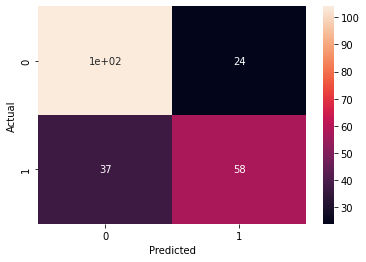

In [49]:
# for one dimension
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

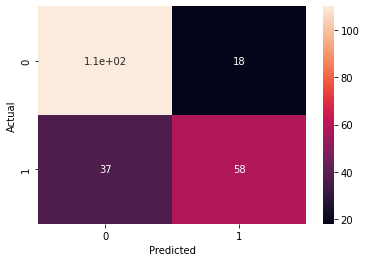

In [50]:
# for multiple dimension
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

We can see that the number of true positive in regression with multiple dimension is bigger than the number of true positive in regression with one dimension, and the number of false positive in regression with multiple dimension is less than the number of false positive in regression with one dimension, which means that regression with multiple dimensions is better than regression with one dimension

## 3. Another validation matrix for classification is ROC / AUC. 
Do your research on them, explain them, and apply them in our case.

The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds. TPR represents the proportion of actual positives that are correctly identified as such by the model, while FPR represents the proportion of actual negatives that are incorrectly identified as positives by the model. The ROC curve shows how well the model can distinguish between positive and negative examples across the entire range of possible classification thresholds.

The AUC is the area under the ROC curve, which ranges from 0 to 1. An AUC of 0.5 means the model performs as well as random guessing, while an AUC of 1 means the model has perfect discrimination ability.

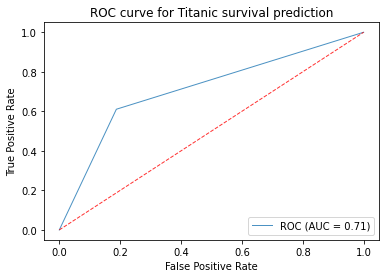

In [60]:
from sklearn.metrics import roc_curve, auc

#one dimension

# predict probabilities on testing set
y_prob = model.predict_proba(x_test)[:, 1]

# calculate TPR and FPR for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot the ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))

# add the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=0.8)

# set plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Titanic survival prediction')
plt.legend(loc="lower right")
plt.show()

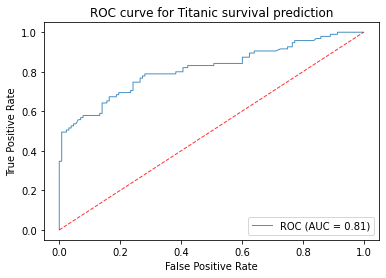

In [61]:
#multiple dimension

# predict probabilities on testing set
Y_prob = Model.predict_proba(X_test)[:, 1]

# calculate TPR and FPR for different classification thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

# plot the ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))

# add the diagonal line (random guessing)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=0.8)

# set plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Titanic survival prediction')
plt.legend(loc="lower right")
plt.show()